This notebook calculates the effective mass of silicon (non spin polarised) and GaAs (spin polarised) using the Castep interface to effmass. These examples are used as test cases for the new interface, and so are compared to existing values in the literature.

In addition to this notebook there is the [general effmass tutorial](https://nbviewer.jupyter.org/github/lucydot/effmass/blob/master/Tutorial.ipynb) and the [effmass documentation](https://effmass.readthedocs.io/en/latest/).

### GaAs

#### 1. Import the relevant effmass modules

In [1]:
from effmass import inputs, outputs, extrema

#### 2. Load the Castep bandstructure data

In [2]:
GaAs_Data = inputs.DataCastep("/Users/lucy/Code/effmass/tests/data_castep/GaAs_sp/","GaAs")

/Users/lucy/miniconda3/lib/python3.8/site-packages/ase/calculators/castep.py:3065: UserWarning: Generating CASTEP keywords JSON file... hang on.
    The CASTEP keywords JSON file contains abstractions for CASTEP input
    parameters (for both .cell and .param input files), including some
    format checks and descriptions. The latter are extracted from the
    internal online help facility of a CASTEP binary, thus allowing to
    easily keep the calculator synchronized with (different versions of)
    the CASTEP code. Consequently, avoiding licensing issues (CASTEP is
    distributed commercially by accelrys), we consider it wise not to
    provide the file in the first place.
  warnings.warn("""Generating CASTEP keywords JSON file... hang on.
/Users/lucy/miniconda3/lib/python3.8/site-packages/ase/calculators/castep.py:477: UserWarning: Could not determine the version of your CASTEP binary 
This usually means one of the following 
   * you do not have CASTEP installed 
   * you have no

This can generate a number of warnings from ASE. In my case it is because Castep is not installed on my system. These can be safely ignored. The final warning is from effmass: as the `.castep` and `.bands` output files do not contain occupancy data, the CBM and VBM are inferred from the Fermi energy, which is not always correct. In this case we find that the position of the CBM and VBM inferred from the fermi level does not make sense, as there is only a band gap of 0.03eV:

In [3]:
print(GaAs_Data.CBM, GaAs_Data.VBM, GaAs_Data.fermi_energy)

-0.395154745952115 -0.42032990254998004 -0.402565222293


As a workaround, we manually re-set the fermi energy (using an educated guess) and then re-find the CBM and VBM:

In [4]:
GaAs_Data.fermi_energy = 0.5
GaAs_Data.find_cbm_vbm()
print (GaAs_Data.CBM, GaAs_Data.VBM, GaAs_Data.fermi_energy)

1.160359014516645 -0.26636788904898 0.5


This makes more sense: the band gap is 1.43eV. The following steps follow the same `effmass` workflow irrespective of the DFT calculator used.

**Note on code structure and support for ASE**

All analysis methods are associated with the `analysis.Segment` class, which is initialised using a `inputs.Data` object and `inputs.Settings` object.

The [`inputs.DataASE`](https://effmass.readthedocs.io/en/latest/_modules/effmass/inputs.html#DataASE) class is able to initialise the parent `inputs.Data` class using an [ASE bandstructure object](https://wiki.fysik.dtu.dk/ase/_modules/ase/spectrum/band_structure.html) and [ASE atoms object](https://wiki.fysik.dtu.dk/ase/ase/atoms.html). If you can create an ASE bandstructure object (with the energies and path specified) and an ASE atoms object (with the reciprocal lattice), you should be able to use `effmass`. We would like to provide a command line interface for more codes that interface with ASE --> please [raise a Github issue](https://github.com/lucydot/effmass/issues/) if there is a particular code you would like support for.

The `DataASE` class does not read in occupancy data, so the CBM/VBM are inferred from the position of the Fermi level. It may be that you need to manually set this via the `Data.fermi_energy` attribute and then re-find the CBM/VBM using the `Data.find_cbm_vbm` method, as outlined above.

#### 3. Specify settings

In [12]:
settings = inputs.Settings(extrema_search_depth=0.25, energy_range=0.8)

#### 4. Find bandstructure segments

In [13]:
GaAs_segments = extrema.generate_segments(settings,GaAs_Data)

#### 5. Plot the segments

(this can take a little time)

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

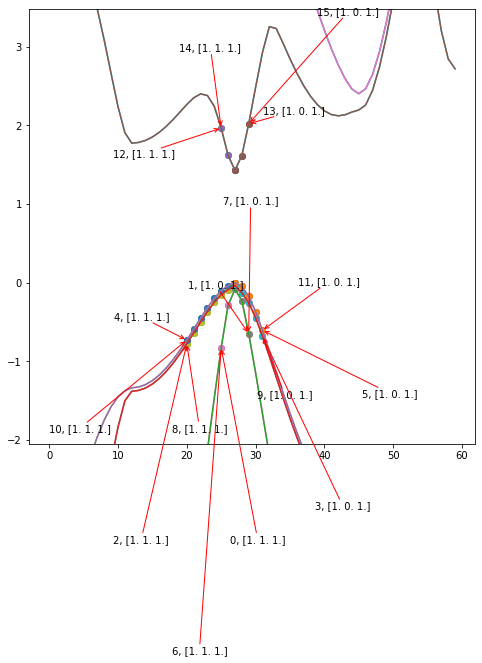

In [14]:
outputs.plot_segments(GaAs_Data,settings,GaAs_segments)

Note that the segments 0 and 6 look like they are pointing to the same segment. They are in fact pointing to the spin up and spin down components that are degenerate in energy. 

#### 6. Find the effective mass

Once you are happy that the bandstructure looks correct and the correct segments have been found you are ready to calculate the effective mass. For a parabolic (single valued) effective mass there are two methods: a finite difference method, and a polynomial least squares fit. In this tutorial we will use the least squares fit.

In [15]:
print(GaAs_segments[0].five_point_leastsq_effmass(),
      GaAs_segments[1].five_point_leastsq_effmass(),
      GaAs_segments[4].five_point_leastsq_effmass(),
      GaAs_segments[5].five_point_leastsq_effmass(),
      GaAs_segments[14].five_point_leastsq_effmass(),
      GaAs_segments[15].five_point_leastsq_effmass())

-0.08375519842679215 -0.10285489566812817 -0.5957758791889523 -0.32865338754489926 0.11363810225369117 0.09628604699642175


#### 7. Comparison to literature values

We will compare it to the values listed [here](https://arxiv.org/ftp/arxiv/papers/1601/1601.05300.pdf). Note that as different levels of theory are used in calculating the dispersions we do not expect agreement to be exact. Rather we are checking that the order of magnitude is correct and that there are no suspicious systematic errors (that arise from, for example, a unit conversion error). Most of the effmass framework (apart from the castep interface) has already been unit tested and validated against literature values.


| particle | direction | calculated value | literature values | 
|----|----|----|-----|
| electron | $\Gamma$-L (111) | 0.11 | 0.08 | 
| electron | $\Gamma$-K (101)| 0.10| 0.08 |
| heavy hole | $\Gamma$-L |0.59 | 0.87 |
| heavy hole | $\Gamma$-K |0.32 | 0.52 | 
| light hole | $\Gamma$-L |0.08 | 0.06 |
| light hole | $\Gamma$-K |0.10 | 0.07 | 




### Si


/Users/lucy/miniconda3/lib/python3.8/site-packages/ase/calculators/castep.py:3065: UserWarning: Generating CASTEP keywords JSON file... hang on.
    The CASTEP keywords JSON file contains abstractions for CASTEP input
    parameters (for both .cell and .param input files), including some
    format checks and descriptions. The latter are extracted from the
    internal online help facility of a CASTEP binary, thus allowing to
    easily keep the calculator synchronized with (different versions of)
    the CASTEP code. Consequently, avoiding licensing issues (CASTEP is
    distributed commercially by accelrys), we consider it wise not to
    provide the file in the first place.
  warnings.warn("""Generating CASTEP keywords JSON file... hang on.
/Users/lucy/miniconda3/lib/python3.8/site-packages/ase/calculators/castep.py:477: UserWarning: Could not determine the version of your CASTEP binary 
This usually means one of the following 
   * you do not have CASTEP installed 
   * you have no

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

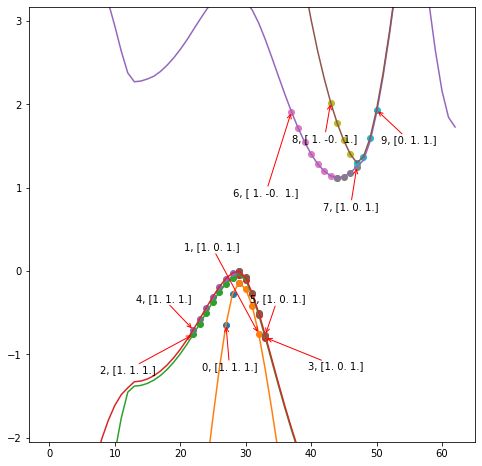

In [16]:
Si_Data = inputs.DataCastep("/Users/lucy/Code/effmass/tests/data_castep/Si_nsp//","Si")
Si_segments = extrema.generate_segments(settings,Si_Data)
outputs.plot_segments(Si_Data,settings,Si_segments)

In [17]:
print(Si_segments[0].five_point_leastsq_effmass(),
      Si_segments[1].five_point_leastsq_effmass(),
      Si_segments[4].five_point_leastsq_effmass(),
      Si_segments[5].five_point_leastsq_effmass(),
      Si_segments[7].five_point_leastsq_effmass())

-0.12179694490966196 -0.23656105459506516 -0.670104714295247 -0.2387279399498762 1.0560231966835663


Comparison to https://ecee.colorado.edu/~bart/book/effmass.htm

| particle | direction | calculated value | literature values - (100) direction | 
|----|----|----|-----|
| electron | $\Gamma$-K (101)| 1.05| 0.98  |
| heavy hole | $\Gamma$-L (111) |0.67 | 0.49 |
| heavy hole | $\Gamma$-K |0.23 | 0.49 | 
| light hole | $\Gamma$-L |0.12 | 0.16 |
| light hole | $\Gamma$-K |0.24 | 0.16 | 

In [18]:
Si_Data.fermi_energy

1.2881053080765